<a href="https://colab.research.google.com/github/thazin31086/GitHub_NeturalNetworks/blob/master/Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


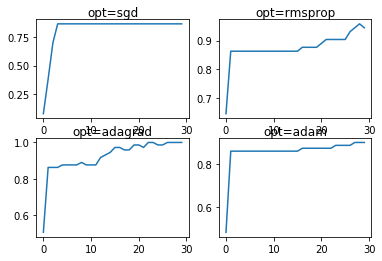

In [4]:
#This Code predict Assignee for Roslyn Issues with Title
import tensorflow as tf
import tensorflow_hub as hub
import keras.backend as K
import keras
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from keras.optimizers import Adam, SGD, RMSprop, Adagrad 
from keras.layers import Input, Lambda, Dense
from keras.models import Model
from keras import backend
from matplotlib import pyplot

url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.Module(url)

data = pd.read_csv('IssueDetailsSVF_20102019_Single.csv')
data = data.sample(frac=1)

y = list(data['Assignee']) 
x = list(data['Title']) 

le = preprocessing.LabelEncoder()
le.fit(y)

categories = list(set(y))

def encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

test = encode(le,categories)

untest = decode(le, test)
x_enc = x
y_enc = encode(le, y)

#80% / 20% train / test split:

train_size = int(len(x) * .8)

x_train = np.asarray(x_enc[:train_size])
y_train = np.asarray(y_enc[:train_size])

x_test = np.asarray(x_enc[train_size:])
y_test = np.asarray(y_enc[train_size:])

def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)))

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
   input_text = Input(shape=(1,), dtype=tf.string)
   embedding = Lambda(UniversalEmbedding, output_shape=(512, ))(input_text)
   dense = Dense(256, activation='relu')(embedding)
   pred = Dense(len(categories), activation='softmax')(dense)
   model = Model(inputs=[input_text], outputs=pred)
   model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
   history = model.fit(trainX, trainy, epochs=30, verbose=0,batch_size=32)
   model.save_weights('./model_SVF_Title_Assignee_Label_Prediction.h5')

   # plot learning curves
   pyplot.plot(history.history['acc'], label='train')
   pyplot.title('opt='+optimizer, pad=-80)
 
y_test = np.asarray(y_enc[train_size:])
y_test = decode(le, y_test)

# create learning curves for different optimizers
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
    for i in range(len(momentums)):
        plot_no = 220 + (i+1)
        pyplot.subplot(plot_no)
        fit_model(x_train, y_train, x_train, y_test, momentums[i])

# show learning curves
pyplot.show() 


In [5]:
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    input_text = Input(shape=(1,), dtype=tf.string)
    embedding = Lambda(UniversalEmbedding, output_shape=(512, ))(input_text)
    dense = Dense(256, activation='relu')(embedding)
    pred = Dense(len(categories), activation='softmax')(dense)
    model = Model(inputs=[input_text], outputs=pred)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    model.load_weights('./model_SVF_Title_Assignee_Label_Prediction.h5')  
    predicts = model.predict(x_test, batch_size=32)  


x_test = np.asarray(x_enc[train_size:])
y_test = np.asarray(y_enc[train_size:])
y_test = decode(le, y_test)
y_preds = decode(le, predicts)

from sklearn import metrics

metrics.confusion_matrix(y_test, y_preds)

print(metrics.classification_report(y_test, y_preds))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


              precision    recall  f1-score   support

     Machiry       0.00      0.00      0.00         3
   unsw-corg       0.00      0.00      0.00         1
    yuleisui       0.79      1.00      0.88        15

    accuracy                           0.79        19
   macro avg       0.26      0.33      0.29        19
weighted avg       0.62      0.79      0.70        19



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
data.shape

(92, 8)